# Access ERA5 data on glade 

In [5]:
from pathlib import Path 
import xarray as xr 

### Glade paths 

In [11]:
pressure_level_data = Path('/glade/campaign/collections/rda/data/d633000/e5.oper.an.pl/')
surface_level_data = Path('/glade/campaign/collections/rda/data/d633000/e5.oper.an.sfc/')
invariant_data= Path('/glade/campaign/collections/rda/data/d633000/e5.oper.invariant/197901/')

### Read in data for a month, for example skin temperature 

In [13]:
year = 2015
month = 1 
subdir = Path(str(year) + str(month).zfill(2))

In [15]:
ds = xr.open_dataset(surface_level_data / subdir / 'e5.oper.an.sfc.128_235_skt.ll025sc.2015010100_2015013123.nc')
ds

<xarray.Dataset>
Dimensions:    (time: 744, latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 2015-01-01 ... 2015-01-31T23:00:00
Data variables:
    SKT        (time, latitude, longitude) float32 ...
    utc_date   (time) int32 ...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.6.3
    CONVERSION_PLATFORM:  Linux r8i2n0 4.12.14-94.41-default #1 SMP Wed Oct 3...
    CONVERSION_DATE:      Sat Aug 31 20:11:04 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Sat Aug 31 20:11:21 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.9 (Homepage = http://n...

### Monthly mean 

In [17]:
skin_temp = ds.SKT.mean('time')

In [20]:
# plotting libraries 
import cmocean as cm 
import matplotlib.pyplot as plt 
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

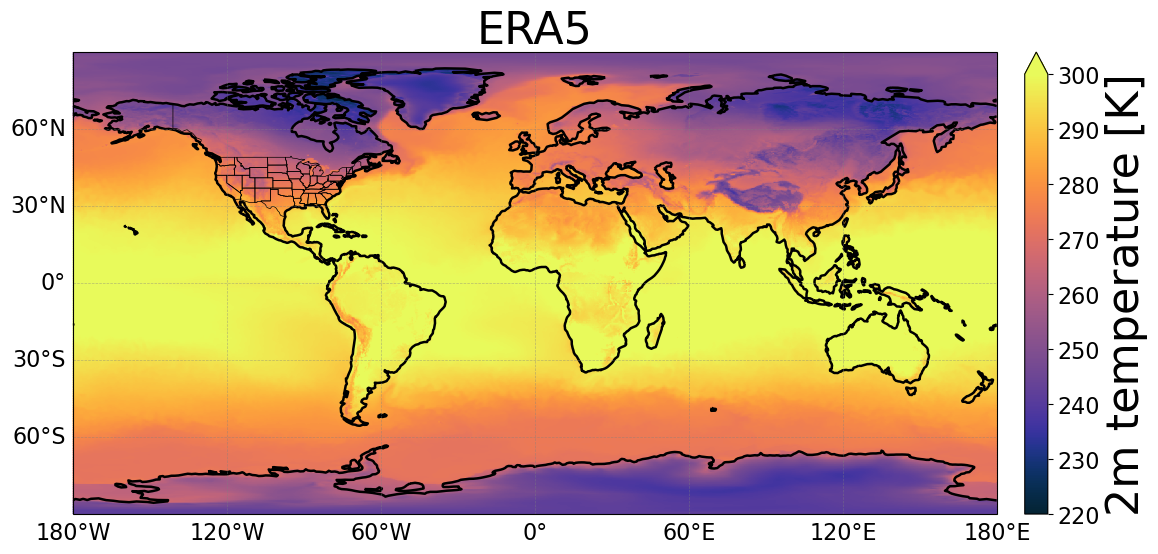

In [24]:
fig = plt.figure(figsize=(18, 6))


ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
fs = 32 
ls = 16 
cmap= cm.cm.thermal


mm = ax.pcolormesh(ds.longitude, ds.latitude, skin_temp.data,
                  transform=ccrs.PlateCarree(),
                  cmap= cmap, vmin = 220, vmax = 300 )


ax.coastlines(lw=1.8, resolution='110m')
gl = ax.gridlines(draw_labels=True,linewidth=0.5, color='gray', alpha=0.5,linestyle='--')

# Customize which labels appear
gl.top_labels = False
gl.right_labels = False
gl.left_labels = True
gl.bottom_labels = True

ax.add_feature(cfeature.STATES, linewidth=0.5) 

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Optional: customize label appearance
gl.xlabel_style = {'size': ls}
gl.ylabel_style = {'size': ls}

cbar = plt.colorbar(mm, orientation='vertical', pad = 0.02, extend = 'max')
cbar.set_label('2m temperature [K]', size = fs) 
cbar.ax.tick_params(labelsize= ls) 

plt.title(f"ERA5",fontsize = fs)
plt.show()